 # AUTOMATIC CHORD-SCALE DETECTION & STUDENT PERFORMANCE ASSESMENT FOR JAZZ IMPROVISATION 

In [1]:
import sys,os
sys.path.append(os.path.join(os.path.dirname('__file__'), 'freesound-python/'))

import freesound
client = freesound.FreesoundClient()
client.set_token("1Dio5sf5Kq7uxPPi4WSQljr4EncEzRjuVdlMV8z8","token")

from IPython.core.display import display, HTML

from utilities import *


#CHORD-SCALE DATASET on freesound.org
freesound_PACK_ID = 24075

#Directory for audio files
audioDir = 'audio/'
#Directory for audio segment annotations
annotationsDir = 'scale_annotations/'
#Directory for Feature Data (.csv and pickle files)
dataDir = 'data/'



#MusicCritic DATASET




#ANALYSIS PARAMETERS FOR FEATURE EXTRACTION

params=AnalysisParams(200,100,'hann',2048,44100,12)

#INITIATE PROPER DATA STRUCTURE
dataDictionary = createDataStructure(annotationsDir) 

### DOWNLOAD THE 'CHORD-SCALE PACK (OR dataset)' FROM FREESOUND

In [3]:
if os.path.exists(audioDir) != 1:
    os.mkdir(audioDir)

pack = client.get_pack(freesound_PACK_ID)
print("Pack name:", pack.name)

results_pager = pack.get_sounds(page_size=50,fields="id,name,username,duration,previews")
 
scaleTypes = []    
TotalDuration = []
for sound in results_pager:
    
    SOUND_NAME = sound.name
    TotalDuration.append(sound.duration)      
    #sound.retrieve_preview(audioDir,SOUND_NAME+".mp3")   
    
    ## dataDict[sound.name][0] has the 'duration' & 'freesoundid' information
    dataDictionary[SOUND_NAME][0]['duration']= sound.duration
    dataDictionary[SOUND_NAME][0]['freesoundid'] = sound.id

print("Number of sounds :", results_pager.count)   
print("Total duration of the dataset : " , np.sum(TotalDuration)/60.0, 'min')

Pack name: Chord-Scale Dataset
Number of sounds : 37
Total duration of the dataset :  40.0042583333 min


### DISPLAY DATA

In [2]:
scaleType = 'phrygian'

SoundsList = []
freesoundids = []
for sound in dataDictionary.items():
    if scaleType in sound[0].split('_')[1] and 'aebersold' not in sound[0].split('_')[0]:
        SoundsList.append(sound)
        freesoundids.append(sound[1][0]['freesoundid'])
        
html = "<h3 style='color:#bb;'>%i) %s</h3>" % (1,scaleType)
html += "<h4>Example sound:</h4><br>"
html += generate_html_with_sound_examples(freesoundids)
html += "<br><br>"
display(HTML(html))

KeyError: 'freesoundid'

### FEATURE EXTRACTION

In [ ]:
'''
DEFINE PARAMETERS FOR FEATURE EXTRACTION

    - AnalysisParams:
        windowSize = 200ms
        hopSize = 100ms
        windowFunction = 'hanning'
        fftN (fftSize) = 2048
        fs (sampleRate) = 44100
        numBins (HPCP Resolution) = 12 bins/octave
        
'''

for fileName,parts in dataDictionary.items():
    #print(fileName)
    for part in parts:
        computeHPCP_FRAMEBASED(part,params)
        computeHPCP_GLOBAL(part)
        
#Saving all results in a pickle file
pickleProtocol=1#choosen for backward compatibility
with open('data/HPCPFeaturesExtracted_ChordScaleDataset.pkl' , 'wb') as f:
    pickle.dump(dataDictionary, f, pickleProtocol)

#Let's clear data and re-read it
print('HPCP (Chroma) Features extracted and saved in a file')                

### METHOD 1 : TEMPLATE-BASED LIKELIHOOD ESTIMATION

In [4]:
### FIRST, LET'S DEFINE A DICTIONARY THAT CONTAINS ALL THE PREDEFINED SCALE TEMPLATES

ScaleTemplates = dict()
    
ScaleTemplates['major'] = {'scaleArray':[1,0,1,0,1,1,0,1,0,1,0,1]}
ScaleTemplates['dorian'] = {'scaleArray':[1,0,1,1,0,1,0,1,0,1,1,0]}
ScaleTemplates['phrygian'] = {'scaleArray':[1,1,0,1,0,1,0,1,1,0,1,0]}
ScaleTemplates['lydian'] = {'scaleArray':[1,0,1,0,1,0,1,1,0,1,0,1]}
ScaleTemplates['mixolydian'] = {'scaleArray':[1,0,1,0,1,1,0,1,0,1,1,0]}
ScaleTemplates['minor'] = {'scaleArray':[1,0,1,1,0,1,0,1,1,0,1,0]}
ScaleTemplates['locrian'] = {'scaleArray':[1,1,0,1,0,1,1,0,1,0,1,0]}
ScaleTemplates['lydianb7'] = {'scaleArray':[1,0,1,0,1,0,1,1,0,1,1,0]}
ScaleTemplates['altered'] = {'scaleArray':[1,1,0,1,1,0,1,0,1,0,1,0]}
ScaleTemplates['mminor'] = {'scaleArray':[1,0,1,1,0,1,0,1,0,1,0,1]}
ScaleTemplates['hminor'] = {'scaleArray':[1,0,1,1,0,1,0,1,1,0,0,1]}
ScaleTemplates['hwdiminished'] = {'scaleArray':[1,1,0,1,1,0,1,1,0,1,1,0]}
ScaleTemplates['wholetone'] = {'scaleArray':[1,0,1,0,1,0,1,0,1,0,1,0]}
ScaleTemplates['chromatic'] = {'scaleArray':[1,1,1,1,1,1,1,1,1,1,1,1]}

Maximum Likeliest Scale of Phrase :minor    with likeliest : 0.105658486572


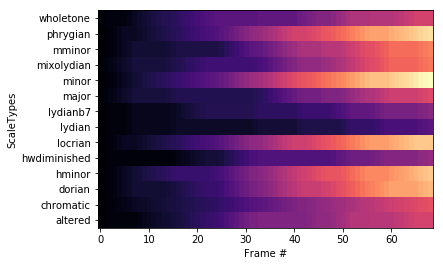

In [5]:
### NOW, LET'S LOAD THE FEATURE DATA WE OBTAINED IN THE PREVIOUS STEPmaxlikelihood2

with open(os.path.join('data','HPCPFeaturesExtracted_ChordScaleDataset.pkl'), 'rb') as f:
    dataDictionary = pickle.load(f)
    
### CHOOSE THE SOUND

SampleData = dataDictionary['toprak_minor']

### THE AUDIO SEGMENT FOR ANALYSIS

numOfAudioSegment = 3

### and THE CHORD-SCALE ESTIMATION METHOD; 1 - Multiplicative, 2 - Additive 

LikelihoodMethod = 2

VisualizeScaleLikelihoods('toprak_minor',numOfAudioSegment,ScaleTemplates,LikelihoodMethod)

## CASE STUDY : SCALE EXERCISE

In [3]:
fileDir = 'chord-scale_exercise/'

FEATURES_Student = FeatureExtraction_single('scalesexercise_solo1.mp3',fileDir,params,'exercise.json')

In [41]:
likelihoodsParts = []
FeatureData = FEATURES_Student
EstimationMethod = 2
for i in range(len(FeatureData)):  
    PartDataHPCP = FeatureData['Part'+str(i+1)]['hpcp']
    hpcpAgg = np.zeros_like(PartDataHPCP)
    likelihoodsVector = []
    for k in range(len(PartDataHPCP)):
        hpcpAgg = hpcpAgg + PartDataHPCP[k]
        maxscalelike, likelihood = ScaleLikelihoodEstimation(hpcpAgg, ScaleTemplates, EstimationMethod)
        framelikelihoods = []
        for j in range(len(likelihood)):
            framelikelihoods.append(likelihood[j][1]['likelihood'])
        
        framelikelihoods = normalize(np.array(framelikelihoods).reshape(1,-1),norm = 'l2')
        framelikelihoods = framelikelihoods[0]
        likelihoodsVector.append(framelikelihoods)    
    likelihoodsParts.append(likelihoodsVector)
    
length =int(len(likelihoodsParts))
    
scaletypes = []
for item in ScaleTemplates:
    scaletypes.append(item)
    scaleTypes = sorted(scaletypes)

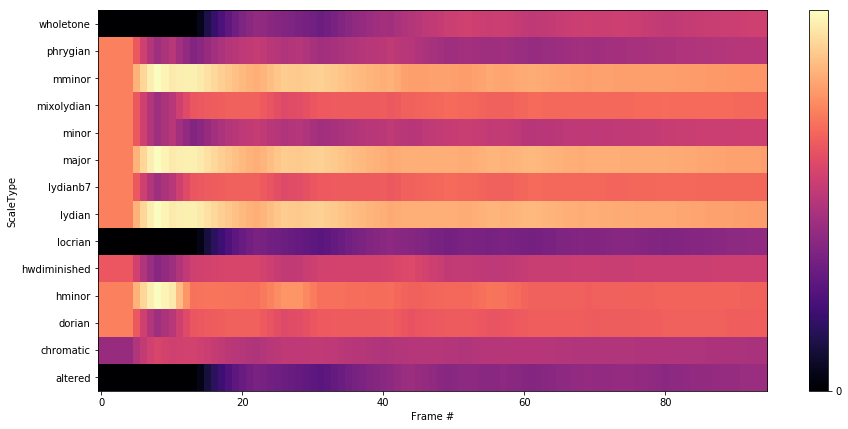

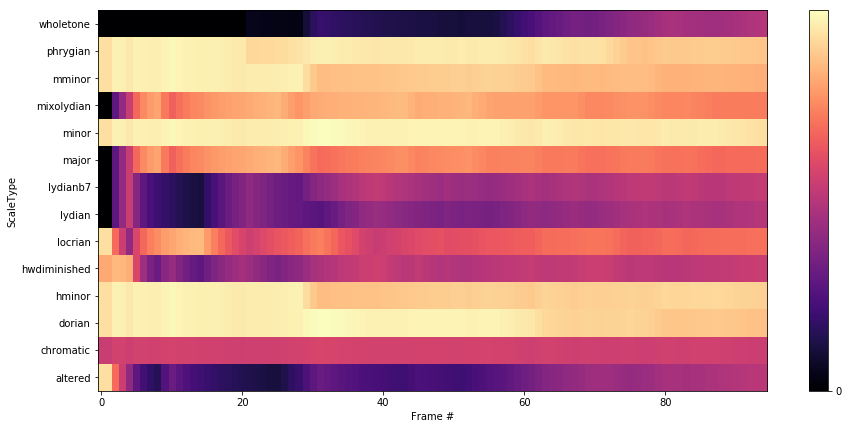

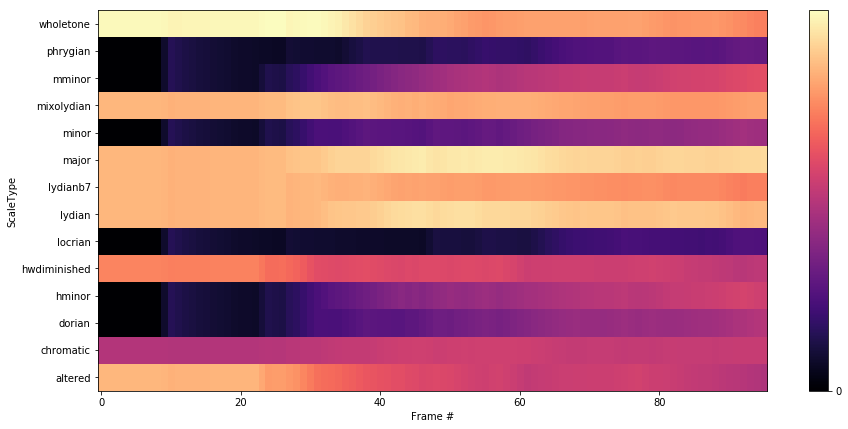

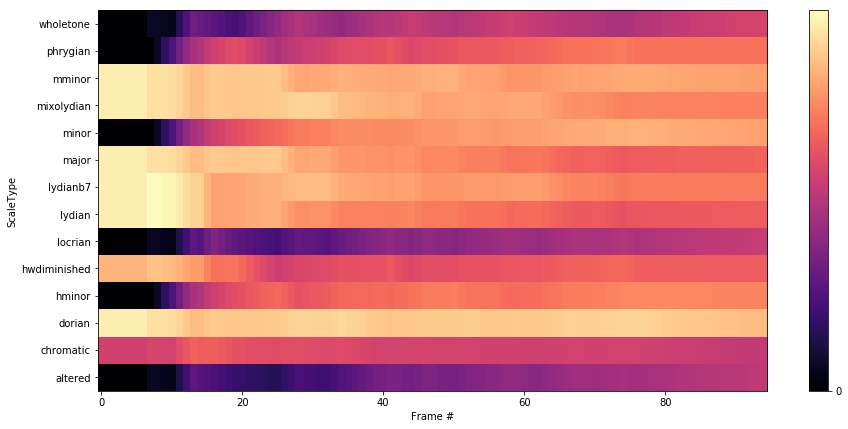

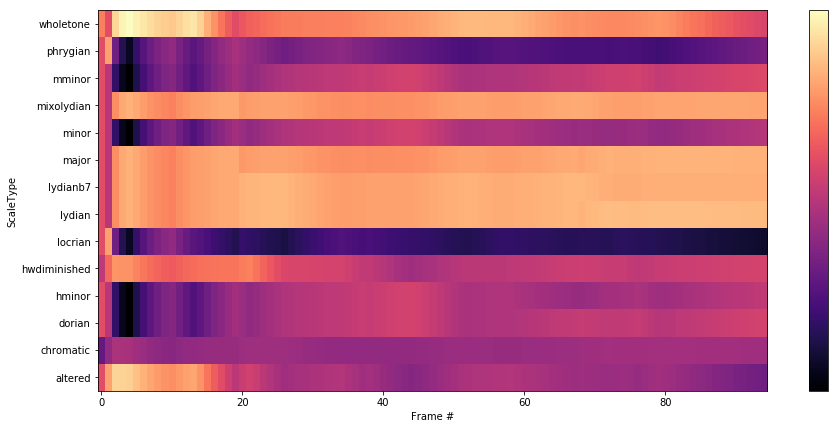

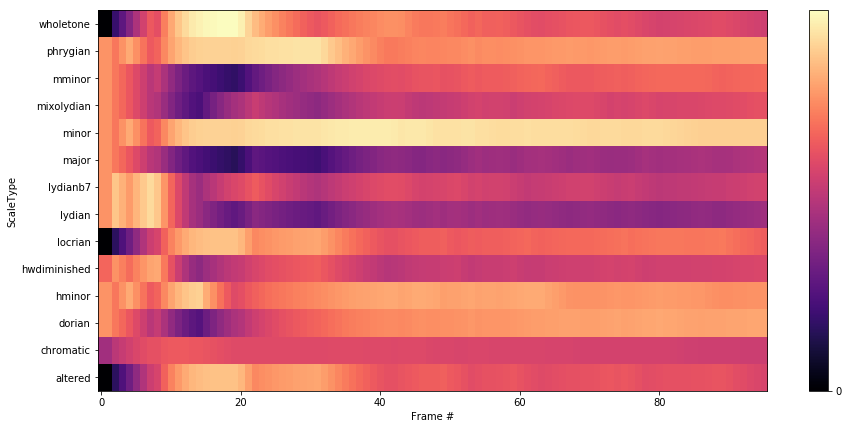

In [43]:
for i in range(length):
                
    fig = plt.figure(figsize=(15,7))
    figure = plt.imshow(np.transpose(likelihoodsParts[i],),aspect = 'auto',interpolation = 'nearest',origin = 'lower',cmap = 'magma',norm=plt.Normalize())
    plt.xlabel('Frame #')
    plt.ylabel('ScaleType')
    tick_marks = np.arange(len(scaleTypes))
    plt.yticks(tick_marks, scaleTypes)
    cbar = fig.colorbar(figure,  ticks=[0, 0.5, 1])
    cbar.ax.set_yticklabels(['0', '0.5', '1'])
    plt.show()

#### ANALYSIS ON SEPERATED REGIONS OF THE EXERCISE

TypeError: Image data cannot be converted to float

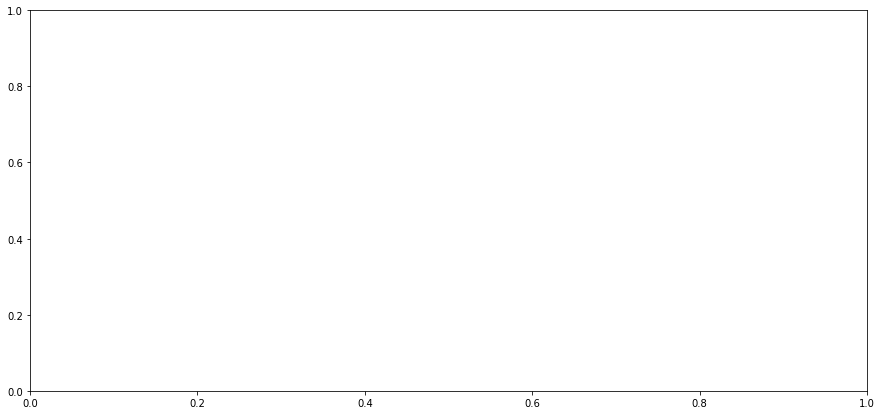

In [5]:
ScaleEstimationCumulative(FEATURES_Student, ScaleTemplates, 2)

#### TEMPORAL ANALYSIS USING ZERO-PADDING TO INCREASE RESOLUTION

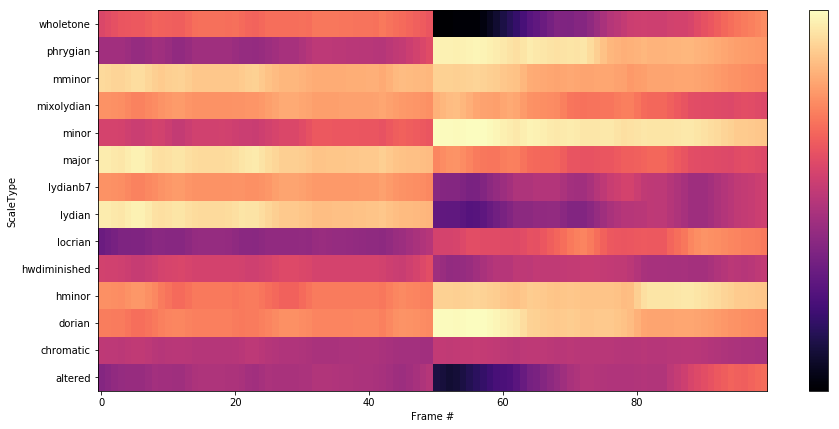

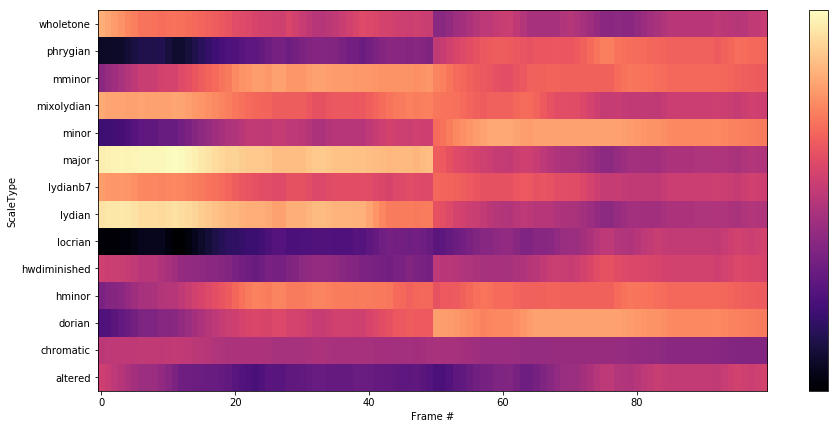

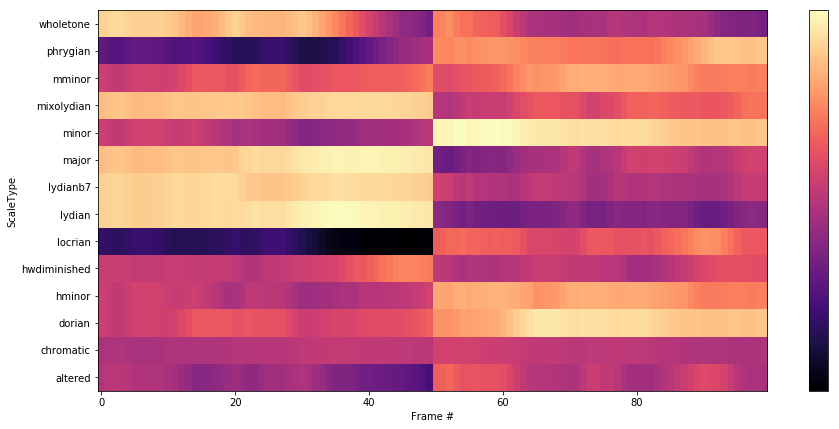

In [4]:
winSize = 100
hopSize = 50

ScaleEstimationAggregate(FEATURES_Student, winSize, hopSize, ScaleTemplates)

### METHOD 2 : CLASSIFICATION USING SVMS (coming soon)

In [ ]:
generateCSV('ExtractedFeatures_for12bins!.pkl',dataDir)        

In [ ]:
Classification('CSVfilefor_12bins.csv', dataDir)

In [ ]:
trained =TrainANDPredict('mycsvfile.csv','CSVfilefor_12bins.csv','chord-scale_exercise/')